# ANLY590
## HW2
## Zikai Zhu

## Problem 1
### 1
<img src="ann.png" width="400">

### 2

$h_1=max(0,w_11x_1+w_21x_2+b_1)$

$h_2=max(0,w_12x_1+w_22x_2+b_2)$

$h_3=max(0,w_13x_1+w_23x_2+b_3)$

$y=\sigma(v_1h_1+v_2h_2+v_3h_3+b_4)$

### 3&4

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#######################
#   Helper functions  #
#######################
# Linear activation
def a(x,w,b):
    a_out = x.dot(w) + b
    return a_out

# Sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def ReLU(z):
    return np.maximum(0,z)

def feedforward_ReLU(x, w, v, b_1, b_2):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    h = ReLU(np.dot(x,w) + b_1)
    y = sigmoid(np.dot(h,v) + b_2)

    return np.array(y)

# Layer 1
b_1 = np.array([0,0,1])
# Layer 2
b_2 = 1

# Restructing for ease of implementation
w_1 = np.array([1,-1,0])
w_2 = np.array([0,0,0.5])

w = np.array([w_1,w_2])
v = np.array([1,0,-1])

x=[[1,-1],[0,-1],[0,1]]
feedforward_ReLU(x, w, v, b_1, b_2)

array([0.81757448, 0.62245933, 0.37754067])

## Problem 2
### 1

$$f(x,y)=(1-x^3)+100*(y^2-x)^2$$

$\frac{df}{dx} = -3x^2+200x-200y^2$

$\frac{df}{dy} = 400y(y^2-x)$


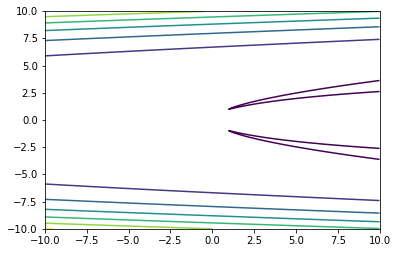

In [169]:
#2
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X**3)+100*(Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

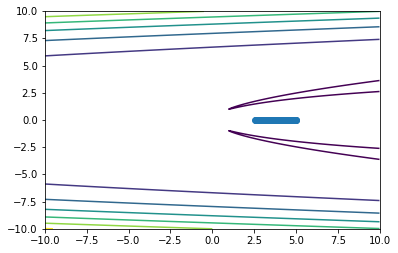

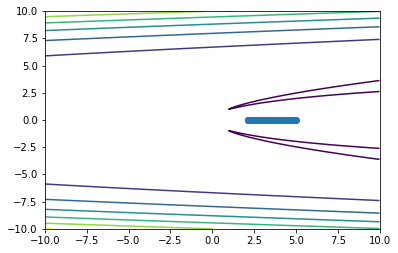

In [170]:
#3
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2+200*x-200*y**2 
    df_dy = 400*y*(y**2-x)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

np.random.seed(10)
traj = grad_descent(starting_point=[5,0],iterations=100, learning_rate=0.000035)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

traj2 = grad_descent(starting_point=[5,0],iterations=100, learning_rate=0.000045)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj2[:,0]
y= traj2[:,1]
plt.plot(x,y,'-o')

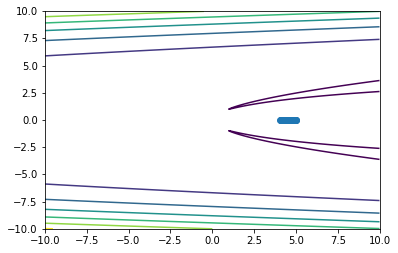

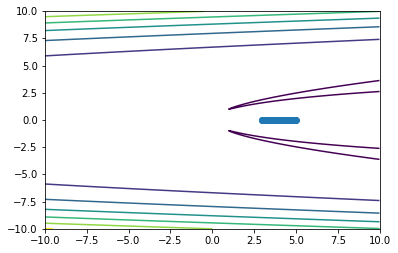

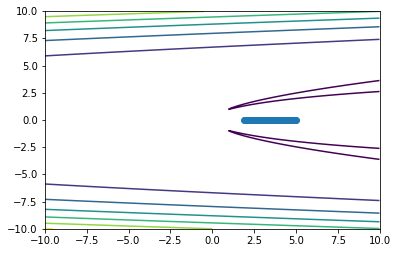

In [171]:
#4
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(len(point))
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

np.random.seed(10)
traj = grad_descent_with_momentum(starting_point=[5,0],iterations=50, epsilon=0.00002, alpha=.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

traj = grad_descent_with_momentum(starting_point=[5,0],iterations=50, epsilon=0.00005, alpha=.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

traj = grad_descent_with_momentum(starting_point=[5,0],iterations=50, epsilon=0.0001, alpha=.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Problem 3
### 1

$\frac{dL}{dw_{ij}}=(y-\hat{y})\cdot v_j\cdot \frac{d}{dx}ReLU(w_{1j}x_1+w_{2j}x_2+b_j)\cdot x_i$

$\frac{dL}{dv_{j}}=(y-\hat{y})\cdot \frac{d}{dx}ReLU(w_{1j}x_1+w_{2j}x_2+b_j)$

$\frac{dL}{db_{j}}=(y-\hat{y})\cdot v_j\cdot \frac{d}{dx}ReLU(w_{1j}x_1+w_{2j}x_2+b_j)$

$\frac{dL}{dc}=(y-\hat{y})$

$\frac{dL}{d\hat{y}}=(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})$

In [180]:
#2
def loss(y, y_hat):
    # Root Mean Squared loss metric
    return np.average(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def ReLU_derivative(x):
    result=[]
    for i in range(len(x)):
        if x[i] > 0:
            result.append(1)
        else:
            result.append(0)
    return result

def yhat(x, coeffs):
    # returns model prediction 
    w11, w12, w13, w21, w22, w23, v1, v2, v3, b1, b2, b3, c = coeffs
    x1 = x[:,0]
    x2 = x[:,1]
    h1=ReLU(w11*x1+w21*x2+b1)
    h2=ReLU(w12*x1+w22*x2+b2)
    h3=ReLU(w13*x1+w23*x2+b3)
    y_hat=sigmoid(v1*h1+v2*h2+v3*h3+c)
    return y_hat

def grad_f(vector, x, y):
    """
    Computes local gradient vector for squared-error loss on OLS regression model cofficients
    """
    w11, w12, w13, w21, w22, w23, v1, v2, v3, b1, b2, b3, c = vector
    x1 = x[:,0]
    x2 = x[:,1]
    prediction = yhat(x, vector) 
    residuals = (y - prediction)
    
    dL_dw11 = -np.average(residuals*v1*ReLU_derivative(w11*x1+w21*x2+b1)*x1)
    dL_dw12 = -np.average(residuals*v2*ReLU_derivative(w12*x1+w22*x2+b2)*x1)
    dL_dw13 = -np.average(residuals*v3*ReLU_derivative(w13*x1+w23*x2+b3)*x1)
    dL_dw21 = -np.average(residuals*v1*ReLU_derivative(w11*x1+w21*x2+b1)*x2)
    dL_dw22 = -np.average(residuals*v2*ReLU_derivative(w12*x1+w22*x2+b2)*x2)
    dL_dw23 = -np.average(residuals*v3*ReLU_derivative(w13*x1+w23*x2+b3)*x2)
    
    dL_dv1 = -np.average(residuals*ReLU_derivative(w11*x1+w21*x2+b1))
    dL_dv2 = -np.average(residuals*ReLU_derivative(w12*x1+w22*x2+b2))
    dL_dv3 = -np.average(residuals*ReLU_derivative(w13*x1+w23*x2+b3))
    
    dL_db1 = -np.average(residuals*v1*ReLU_derivative(w11*x1+w21*x2+b1))
    dL_db2 = -np.average(residuals*v2*ReLU_derivative(w12*x1+w22*x2+b2))
    dL_db3 = -np.average(residuals*v3*ReLU_derivative(w13*x1+w23*x2+b3))
    
    dL_dc = -np.average(residuals)
    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw21, dL_dw22, dL_dw23, 
                     dL_dv1,dL_dv2,dL_dv3,dL_db1,dL_db2,dL_db3,dL_dc])

def grad_descent(x, y, starting_point=None, iterations=10, learning_rate=1e-2):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=13).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x,point))]

    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        #print(grad[0])
        trajectory.append(point)
        losses.append(loss(y, yhat(x,point)))
    return (np.array(trajectory), losses)

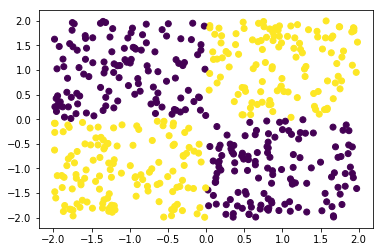

In [209]:
#3
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

Text(0.5,0,'Iteration')

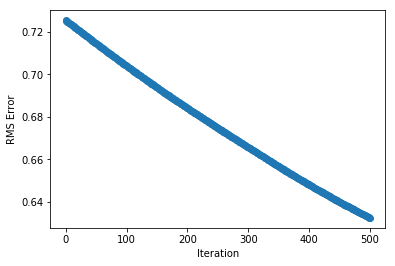

In [192]:
#4
traj, losses = grad_descent(x, y, iterations=500,learning_rate=0.003)
plt.plot(losses,'o')
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

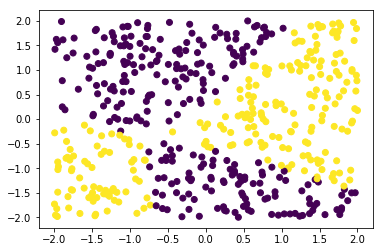

In [193]:
plt.scatter(x[:,0],x[:,1],c=yhat(x,traj[500])>0.5)

Text(0.5,0,'Iteration')

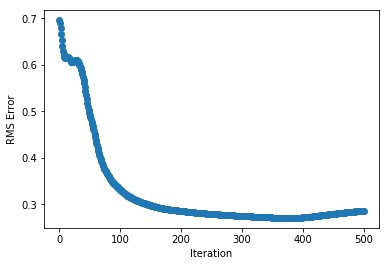

In [200]:
#5 gradient descent with momentum
def grad_descent_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=13).astype("float128")
    trajectory = [point]
    v = np.zeros(point.size)
    losses = [loss(y, yhat(x,point))]

    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        #print(grad[0])
        trajectory.append(point)
        losses.append(loss(y, yhat(x,point)))
    return (np.array(trajectory), losses)

traj, losses = grad_descent_momentum(x, y, iterations=500, alpha=.9, epsilon=1e-1)
plt.plot(losses,'o')
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

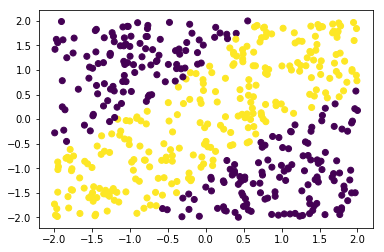

In [201]:
plt.scatter(x[:,0],x[:,1],c=yhat(x,traj[500])>0.5)

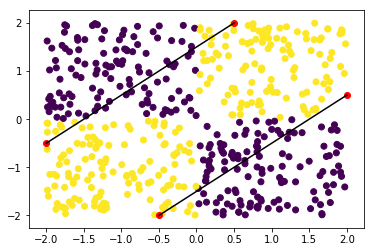

In [211]:
#6
import matplotlib.pyplot as plt

xx=[-2 ,-0.5 ,0.5,2]
yy=[-0.5, -2, 2,0.5]

plt.plot(xx,yy, 'ro')

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

connectpoints(xx,yy,0,2)
connectpoints(xx,yy,1,3)

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()